<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

In [1]:
NAME = "AIPI Project Visualization by Chen Bian"
TEAM_MEMBER = "Chen Bian" "Asmita Dalai", "Yue Zhang", "Yufei Lei"

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

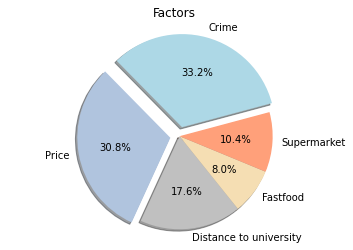

In [3]:
factors = [33.2,30.8,17.6,8,10.4]

my_labels = 'Crime','Price','Distance to university','Fastfood','Supermarket'
my_colors = ['lightblue','lightsteelblue','silver', 'wheat','lightsalmon']
my_explode = (0.1, 0.1, 0, 0, 0)
plt.pie(factors, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Factors')
plt.axis('equal')
plt.savefig('example.png')

# Data Visualization Preparation Job

We just need to clean the three datasets that we want to visualize.

In [4]:
# Read the files
supermarket = pd.read_csv('Supermarkets2C_Warehouse_Clubs_and_Supercenters.csv') 
fastfood = pd.read_csv('fastfoodmaps_locations_2007.csv', header=None) 
apartment_c = pd.read_csv('Durham_Apartment_Dataset.csv')

# Clean the data, get the columns we want
fastfood.columns =['sequence', 'Alphabet', 'Address', 'City', 'State', 'Zip Code', 'Phone', 'latitude', 'Longitude','Unknown']
fastfood = fastfood.drop(columns=['sequence', 'Alphabet', 'Phone', 'Unknown'])
fastfood = fastfood.loc[fastfood['City'] == 'Durham']

# The fastfood in this Row is too far away, which can't be included in Durham's map, so we just delete
fastfood = fastfood.drop(38210)

# Clean the data, get the columns we want
supermarket = supermarket.drop(columns=['OBJECTID', 'facilityid', 'facilityarea', 'agency',
                          'agencytype', 'agencyurl', 'pocname', 'pocphone', 'pocemail',
                          'phone', 'operdays', 'operhours', 'adultmeals', 'readytoeatmeals',
                          'comments', 'GlobalID', 'created_user', 'created_date', 'last_edited_user', 
                          'last_edited_date', 'snapauthorized'])

supermarket = supermarket.rename(columns={"X": "Longitude", "Y": "Latitude", "factype": "type", "fulladdr": "address", "municipality": "city"})

# Data Visualization 
We download the street map of Durham, and we plot our all dataset in this street map.
https://catalog.data.gov/dataset/tiger-line-shapefile-2018-county-durham-county-nc-all-roads-county-based-shapefile

<AxesSubplot:>

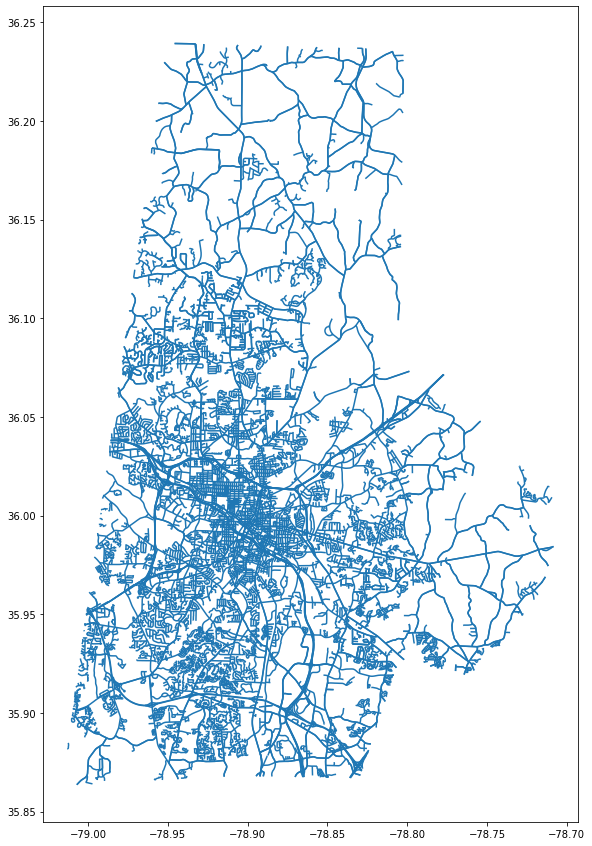

In [6]:
# Show the street map
durham_map = gpd.read_file('tl_2018_37063_roads.shx')
fig, ax = plt.subplots(figsize = (15,15))
durham_map.plot(ax=ax)

In [7]:
# We need to transfer our longitude and latitude columns into point pairs

# Transfer the fastfood locations' longitude and latitude
geometry = [Point(xy) for xy in zip(fastfood.Longitude, fastfood.latitude)]
fastfood['geometry'] = geometry
fastfood.drop(['latitude','Longitude'], axis = 1, inplace=True)

# Transfer the supermarket locations' longitude and latitude
geometry1 = [Point(xy) for xy in zip(supermarket.Longitude, supermarket.Latitude)]
supermarket['geometry1'] = geometry1
supermarket.drop(['Latitude','Longitude'], axis = 1, inplace=True)

# Transfer the apartment locations' longitude and latitude
geometry2 = [Point(xy) for xy in zip(apartment_c.Longitude, apartment_c.Latitude)]
apartment_c['geometry2'] = geometry2
apartment_c.drop(['Latitude','Longitude'], axis = 1, inplace=True)

# Transfer the university locations' longitude and latitude
u = {'Longitude': [-78.93824053356649], 'Latitude': [36.00163117620302]}
university = pd.DataFrame(data = u)


geometry3 = [Point(xy) for xy in zip(university.Longitude, university.Latitude)]
university['geometry3'] = geometry3
university.drop(['Latitude','Longitude'], axis = 1, inplace=True)


In [8]:
# The longitude and latitude is not the real 2D points, so we need to put the point (longitude, latitude) into xy coordinate system
crs = {'init': 'epsg:4326'}
fastfood_locs = gpd.GeoDataFrame(fastfood, crs=crs, geometry=geometry)
supermarket_locs = gpd.GeoDataFrame(supermarket, crs=crs, geometry=geometry1)
apartment_c_locs = gpd.GeoDataFrame(apartment_c, crs=crs, geometry=geometry2)
university_locs = gpd.GeoDataFrame(university, crs=crs, geometry=geometry3)

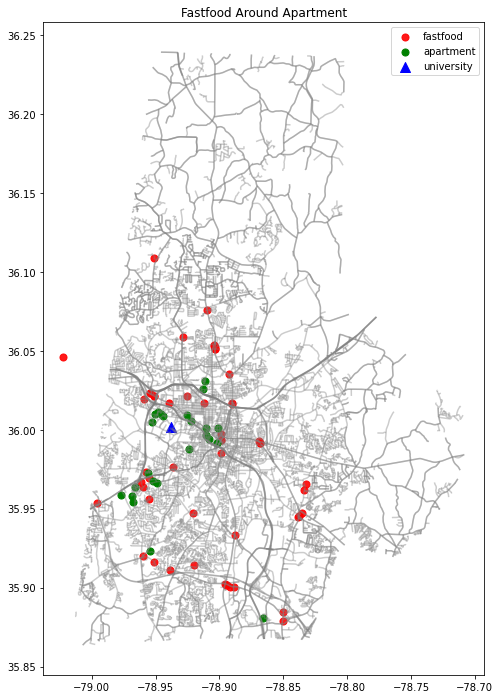

In [9]:
# use matplotlib to plot the data
fig, ax = plt.subplots(figsize = (12,12))
durham_map.plot(color='grey', ax=ax, alpha = 0.4)
fastfood_locs.geometry.plot(marker='o', color='red', alpha = 0.9, markersize=50, ax=ax, label = 'fastfood')
apartment_c_locs.geometry.plot(marker='o', color='green', markersize=50, ax=ax, label = 'apartment')
university_locs.geometry.plot(marker='^', color='blue', markersize=100, ax=ax, label = 'university')
plt.title('Fastfood Around Apartment')
plt.legend()
plt.savefig('./Fastfood Around Apartment.jpg')

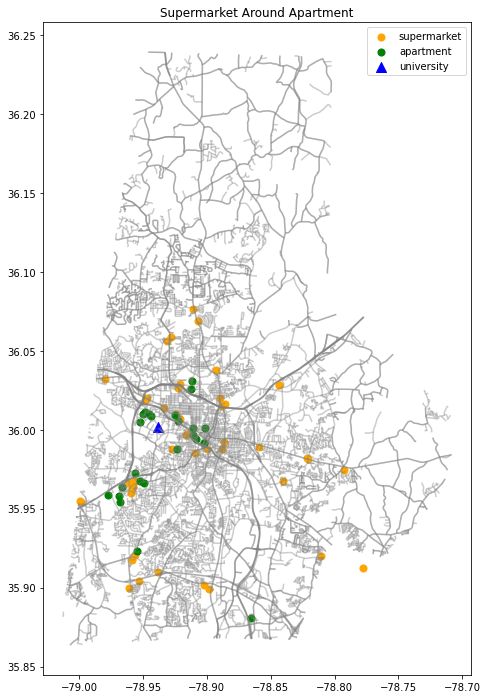

In [10]:
fig, ax = plt.subplots(figsize = (12,12))
durham_map.plot(color='grey', ax=ax, alpha = 0.4)
supermarket_locs.geometry.plot(marker='o', color='orange', markersize=50, ax=ax, label = 'supermarket')
apartment_c_locs.geometry.plot(marker='o', color='green', markersize=50, ax=ax, label = 'apartment')
university_locs.geometry.plot(marker='^', color='blue', markersize=100, ax=ax, label = 'university')
plt.title('Supermarket Around Apartment')
plt.legend()
plt.savefig('./Supermarket Around Apartment.jpg')